In [72]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [73]:
df=pd.read_csv('/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv')

In [74]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [75]:
df.info()  #To check data types and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [76]:
df.duplicated().sum()   #To chech duplicate number of rows

0

In [77]:
df.drop(columns=['Serial No.'],inplace=True)

In [78]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [79]:
X=df.iloc[:,0:-1]    #taking all rows and take columns from [0 to -1)
y=df.iloc[:,-1]      #taking all rows and last column

In [80]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [81]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [82]:
y_train

238    0.70
438    0.67
475    0.59
58     0.36
380    0.78
       ... 
255    0.79
72     0.93
396    0.84
235    0.88
37     0.58
Name: Chance of Admit , Length: 400, dtype: float64

In [83]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [84]:
X_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

In [85]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [86]:
model= Sequential()
model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(1,activation='relu'))
model.add(Dense(1,activation='relu'))
model.add(Dense(1,activation='linear'))


In [87]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 7)                 56        
                                                                 
 dense_15 (Dense)            (None, 1)                 8         
                                                                 
 dense_16 (Dense)            (None, 1)                 2         
                                                                 
 dense_17 (Dense)            (None, 1)                 2         
                                                                 
Total params: 68
Trainable params: 68
Non-trainable params: 0
_________________________________________________________________


In [88]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [89]:
history=model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 27ms/step - loss: 0.5234 - val_loss: 0.5646
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 0.5094 - val_loss: 0.5499
Epoch 3/100
10/10 [==============================] - 0s 9ms/step - loss: 0.4955 - val_loss: 0.5355
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.4820 - val_loss: 0.5213
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 0.4688 - val_loss: 0.5074
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.4557 - val_loss: 0.4939
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4431 - val_loss: 0.4806
Epoch 8/100
10/10 [==============================] - 0s 6ms/step - loss: 0.4306 - val_loss: 0.4676
Epoch 9/100
10/10 [==============================] - 0s 8ms/step - loss: 0.4186 - val_loss: 0.4549
Epoch 10/100
10/10 [==============================] - 0s 6ms/step - loss: 0.4066 - val_loss: 0.4425
Epoch 11

In [90]:
y_pred=model.predict(X_test_scaled)

4/4 [==============================] - 0s 3ms/step


In [91]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

-0.4707195877987862

To Increase Model efficiency, increase epochs and increase number of layers

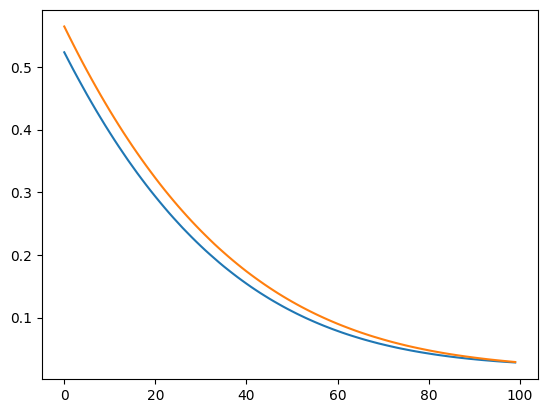

In [93]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])